In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
import os
from matplotlib.ticker import MaxNLocator

In [3]:
with open('config.json') as f:
    data = json.load(f)

if (data['dirName'] != ""):
    full_path = f"{data['dirPath']}/{data['dirName']}"
else:
    # get the most recently run experiment
    path = data['dirPath']
    folder_names = sorted([f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))])
    print(folder_names)
    most_recent = folder_names[-1]
    print(f"defaulting to most recent experiment: {most_recent}")
    full_path = f"{path}/{most_recent}"

['2025_05_08_14:19:09.987604', '2025_05_08_14:28:26.813704', '2025_05_14_08:14:16.516952']
defaulting to most recent experiment: 2025_05_14_08:14:16.516952


In [4]:
read_csv_path = f"{full_path}/numReadPorts.csv"
write_csv_path = f"{full_path}/numWritePorts.csv"
read_img_path = f"{full_path}/numReadPorts.png"
write_img_path = f"{full_path}/numWritePorts.png"

In [5]:
read_df = pd.read_csv(read_csv_path)
write_df = pd.read_csv(write_csv_path)

In [6]:
read_df

,rule_title,rule_description,user_defined_key,file,num_read_ports,count
0,arithmetic end memory/branch,NaN,0,astar,0,99578611
1,arithmetic end memory/branch,NaN,0,astar,1,5349582679
2,arithmetic end memory/branch,NaN,0,astar,2,2010054029
3,arithmetic end memory/branch,NaN,0,astar,3,4412947860
4,arithmetic end memory/branch,NaN,0,astar,4,6731934542
...,...,...,...,...,...,...
151,arithmetic end memory/branch,NaN,0,xalancbmk,10,10794389
152,arithmetic end memory/branch,NaN,0,xalancbmk,11,154996
153,arithmetic end memory/branch,NaN,0,xalancbmk,12,31025
154,arithmetic end memory/branch,NaN,0,xalancbmk,13,1612


In [7]:
read_grouped = read_df.groupby(['rule_title'], dropna=False, sort=False)
write_grouped = write_df.groupby(['rule_title'], dropna=False, sort=False)

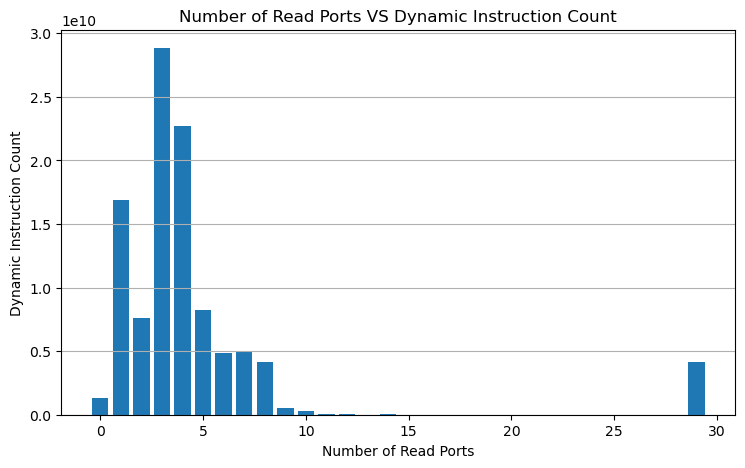

In [16]:
num_groups = len(read_grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(40, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(read_grouped):
    data = group_data.reset_index()
    axes[i].bar(data['num_read_ports'], data['count'])
    axes[i].set_title(f'Number of Read Ports VS Dynamic Instruction Count')
    axes[i].set_xlabel('Number of Read Ports')
    axes[i].set_ylabel('Dynamic Instruction Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    # axes[i].set_ylim(bottom=0, top=100)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig(read_img_path, dpi=300, bbox_inches='tight')
plt.show()

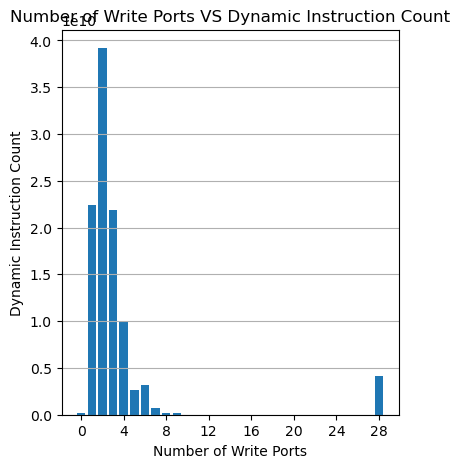

In [ ]:
num_groups = len(write_grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(40, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(write_grouped):
    data = group_data.reset_index()
    axes[i].bar(data['num_write_ports'], data['count'])
    axes[i].set_title(f'Number of Write Ports VS Dynamic Instruction Count')
    axes[i].set_xlabel('Number of Write Ports')
    axes[i].set_ylabel('Dynamic Instruction Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    # axes[i].set_ylim(bottom=0, top=100)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig(write_img_path, dpi=300, bbox_inches='tight')
plt.show()